In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
quandl.ApiConfig.api_key = 'dhhdEzYzb6DoDo5YF7UL'

In [36]:
## I decided to use disposable personal income starting in the year 2000 to go along with nfl salaries to give a better idea on initial signing contract values 

In [13]:
data = quandl.get('FRED/DSPI')

In [14]:
data.head(5)

,Value
Date,
1959-01-01,351.5
1959-02-01,352.9
1959-03-01,355.2
1959-04-01,358.2
1959-05-01,360.3


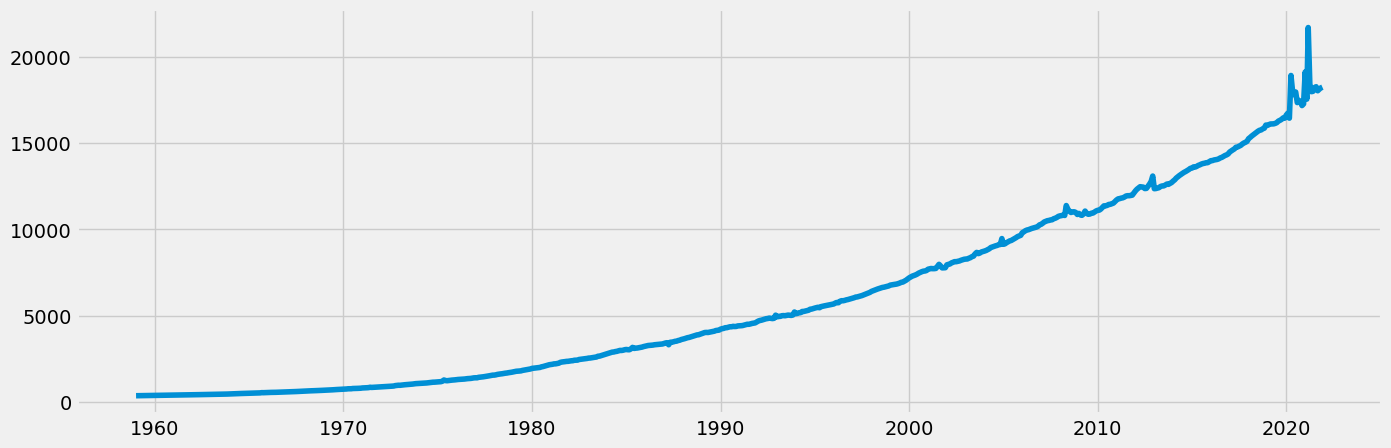

In [15]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(data)

In [16]:
data_2 = data.reset_index()

In [17]:
data_sub = data_2.loc[(data_2['Date'] >= '2000-01-01')]

In [18]:
data_sub.head()

,Date,Value
492,2000-01-01,7184.0
493,2000-02-01,7234.5
494,2000-03-01,7285.2
495,2000-04-01,7316.4
496,2000-05-01,7352.9


In [19]:
data_sub.shape

(264, 2)

In [20]:
from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-01,7184.0
2000-02-01,7234.5
2000-03-01,7285.2
2000-04-01,7316.4
2000-05-01,7352.9


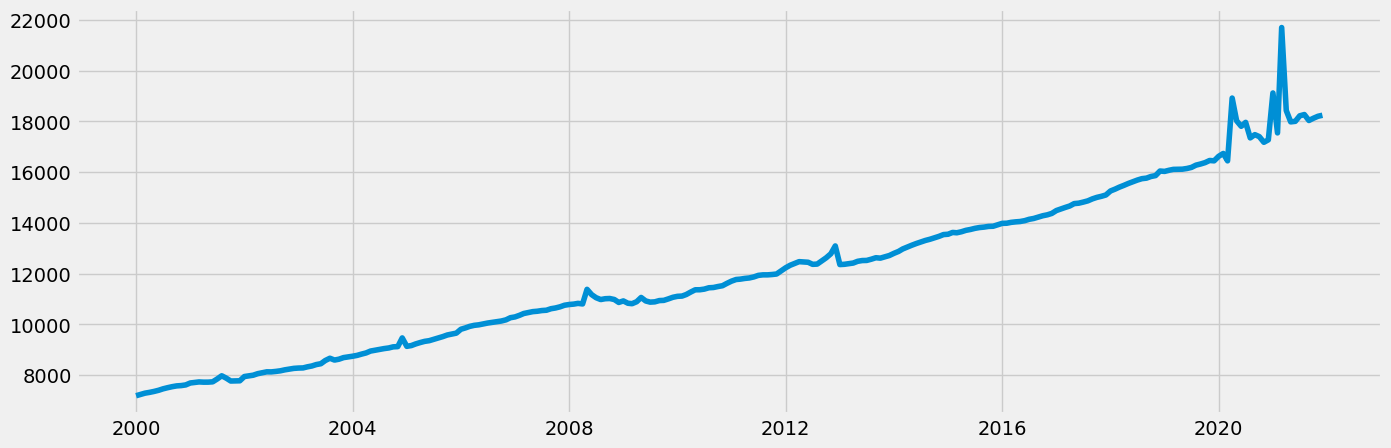

In [21]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [22]:
data_sub.isnull().sum() 

Value    0
dtype: int64

In [24]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [25]:
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

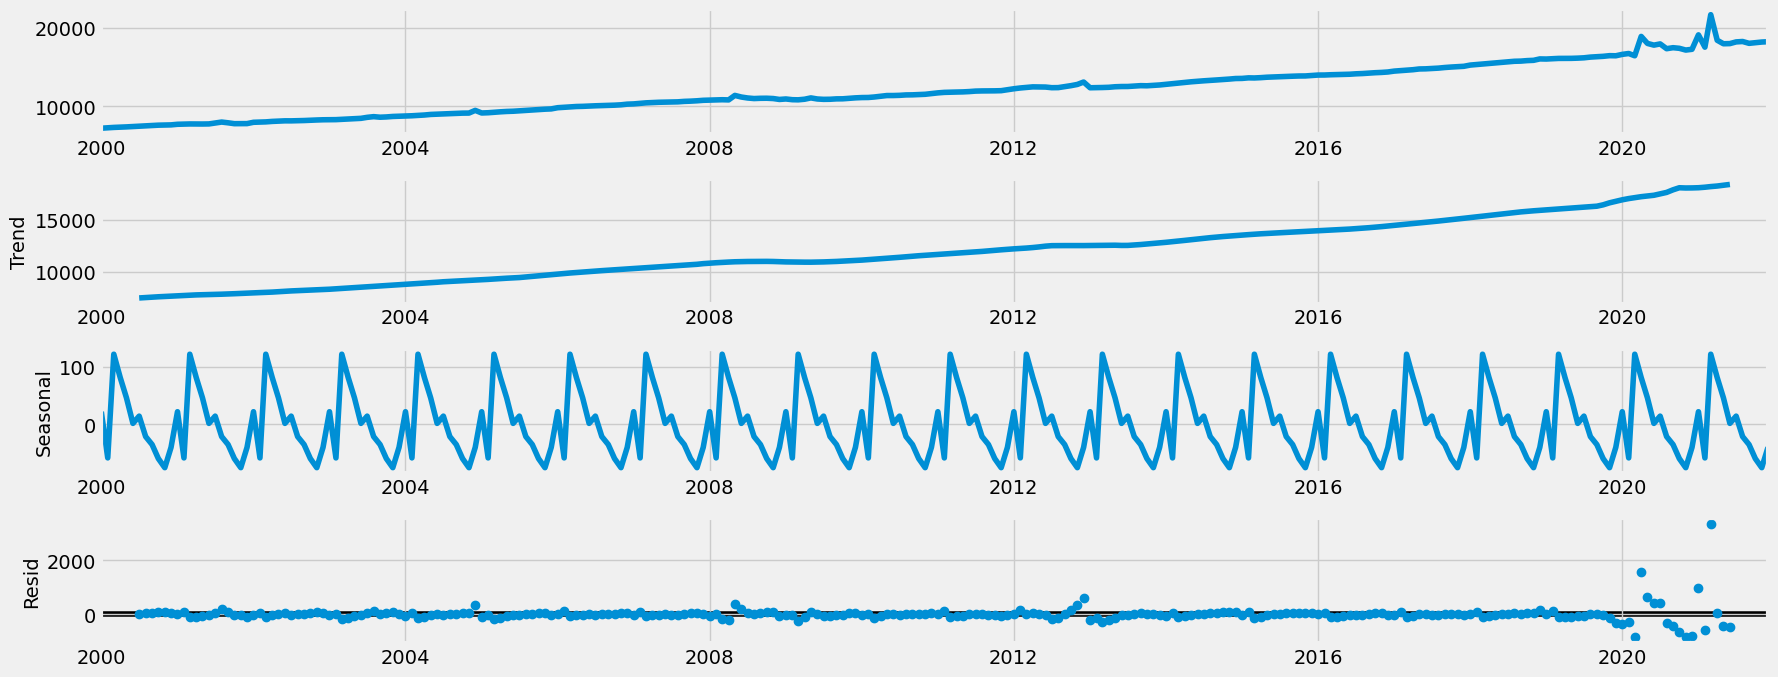

In [26]:
decomposition.plot()
plt.show()

In [27]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   6.110844
p-value                          1.000000
Number of Lags Used             20.000000
Number of Observations Used    735.000000
Critical Value (1%)             -3.439278
Critical Value (5%)             -2.865480
Critical Value (10%)            -2.568868
dtype: float64


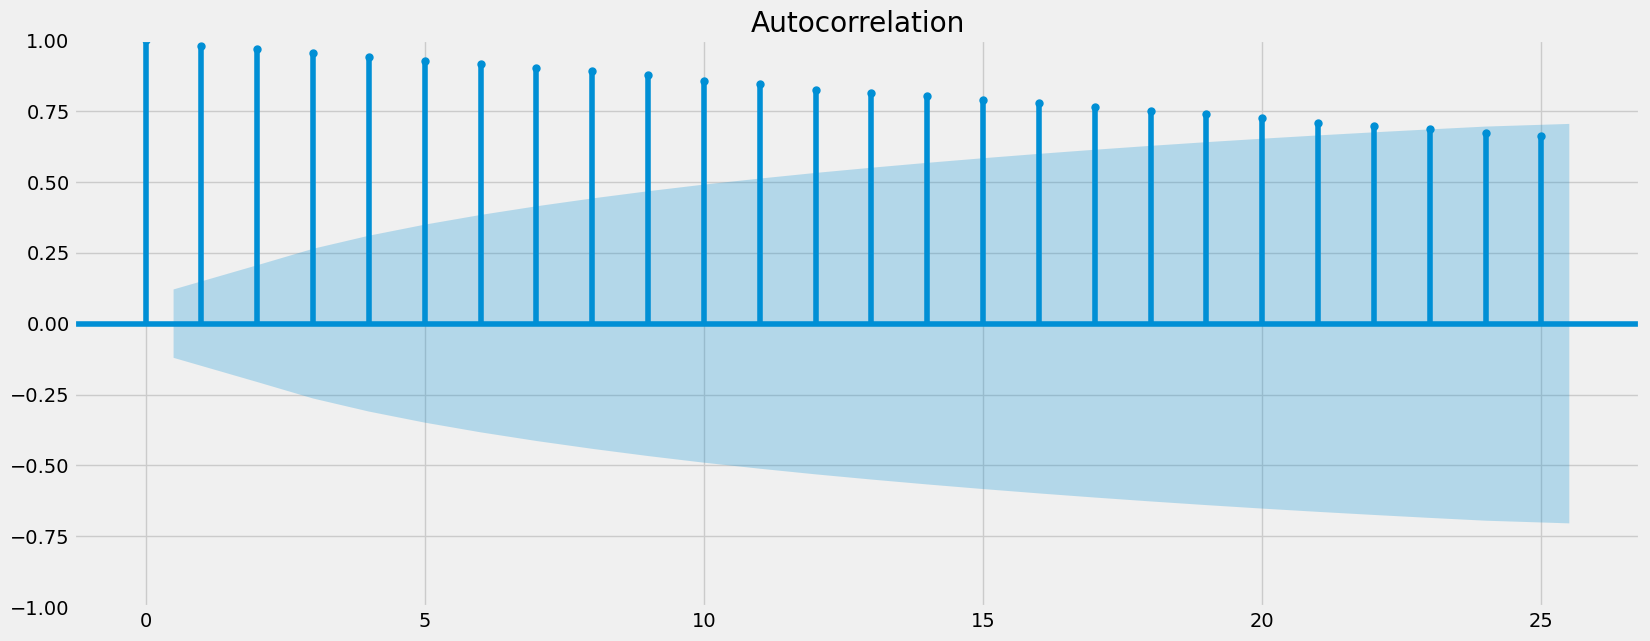

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

In [29]:
data_diff = data_sub - data_sub.shift(1)

In [30]:
data_diff.dropna(inplace = True)

In [31]:
data_diff.head()

,Value
datetime,
2000-02-01,50.5
2000-03-01,50.7
2000-04-01,31.2
2000-05-01,36.5
2000-06-01,45.3


In [32]:
data_diff.columns

Index(['Value'], dtype='object')

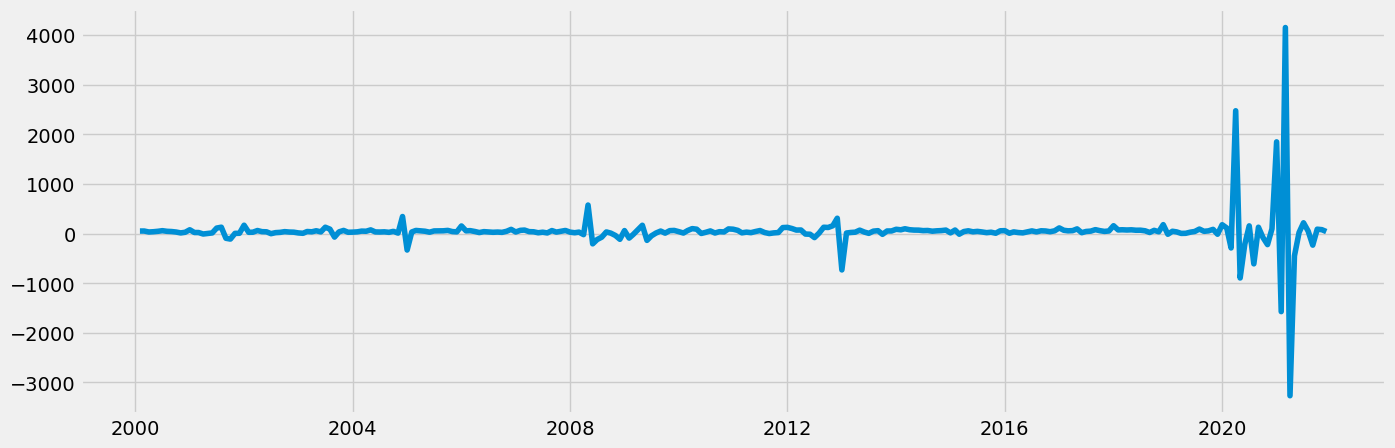

In [33]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [34]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.223922
p-value                          0.018641
Number of Lags Used             16.000000
Number of Observations Used    246.000000
Critical Value (1%)             -3.457215
Critical Value (5%)             -2.873362
Critical Value (10%)            -2.573070
dtype: float64


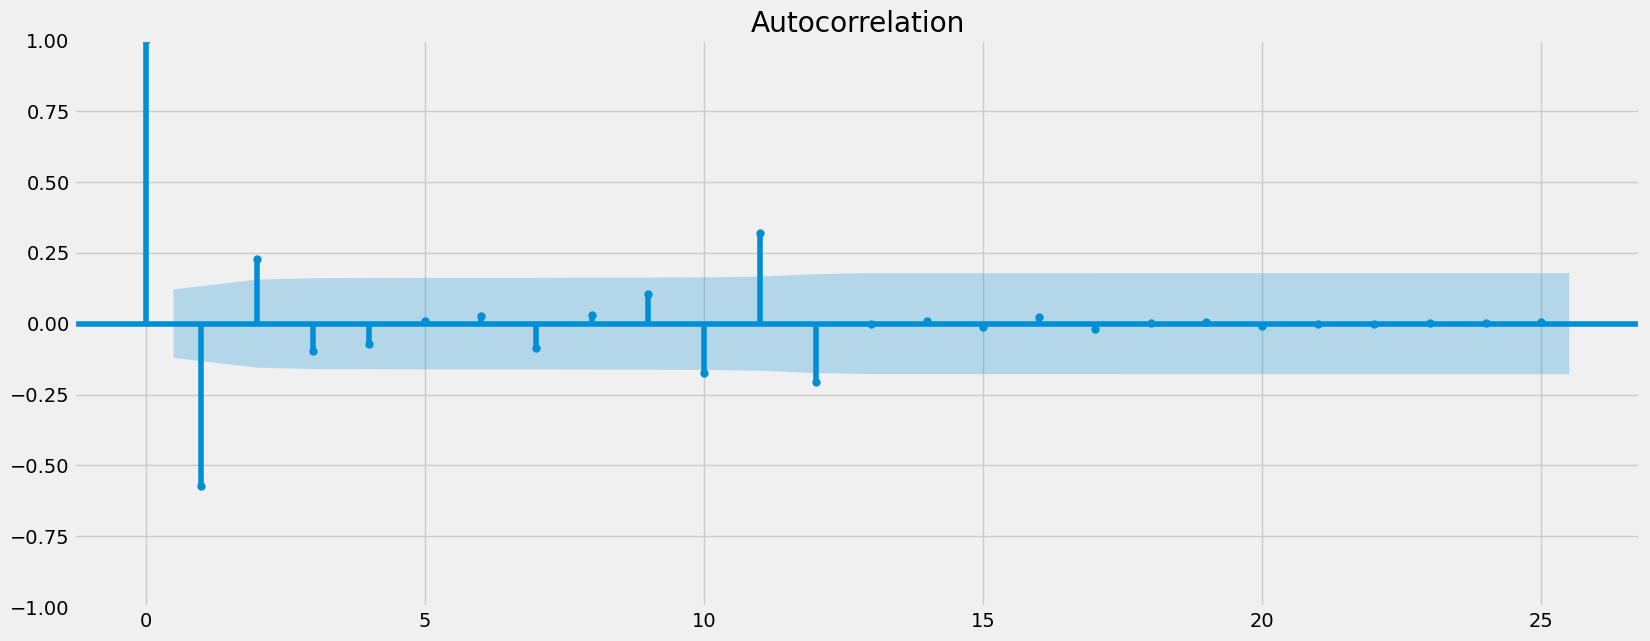

In [35]:
plot_acf(data_diff)
plt.show()